<a href="https://colab.research.google.com/github/murni27/Bank-loan-repayment-prediction/blob/main/Cleaning_%26_handle_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/home_credit/application_train.csv')

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.reset_index()

In [ ]:
df['AMT_ANNUITY'].isnull().values.any()

True

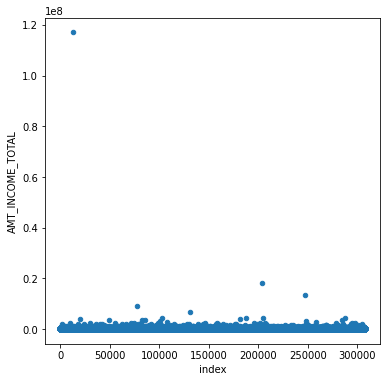

In [ ]:
df.plot(kind='scatter', x='index', y='AMT_INCOME_TOTAL', figsize=(6,6))

In [ ]:
def find_boundaries(df, variables):

  # lets find the IQR (Inter Quantile range)
  Q1 = df[variables].quantile(.25)
  Q3 = df[variables].quantile(.75)
  IQR = Q3 - Q1
  lower_boundry = Q1 -1.5* IQR 
  upper_boundry = Q3 + 1.5*IQR 

  return lower_boundry, upper_boundry

let's find upper and lower limits for amount income

In [ ]:
lower_income, upper_income = find_boundaries(df, 'AMT_INCOME_TOTAL')
print('upper limit for amount income total is', upper_income)
print('lower limit for amount income total is', lower_income)

upper limit for amount income total is 337500.0
lower limit for amount income total is -22500.0


In [ ]:
outliers_income = np.where(df['AMT_INCOME_TOTAL'] > upper_income, True,
                           np.where(df['AMT_INCOME_TOTAL'] < lower_income, True, False))

In [ ]:
outliers_income

array([False, False, False, ..., False, False, False])

In [ ]:
df.shape

(307511, 123)

In [ ]:
engineered_data = df.loc[~(outliers_income),]

In [ ]:
engineered_data.shape

(293476, 123)

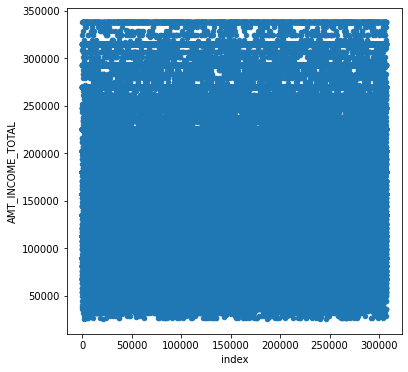

In [ ]:
engineered_data.plot(kind='scatter', x='index', y='AMT_INCOME_TOTAL', figsize=(6,6))

In [ ]:
engineered_data.to_csv('data_app.csv', index = False)

In [ ]:
#df.loc[5266:5267]

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
5266,5266,268057,0,Cash loans,M,Y,Y,0,900000.0,1130791.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
5267,5267,331181,0,Cash loans,M,Y,N,0,225000.0,497520.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


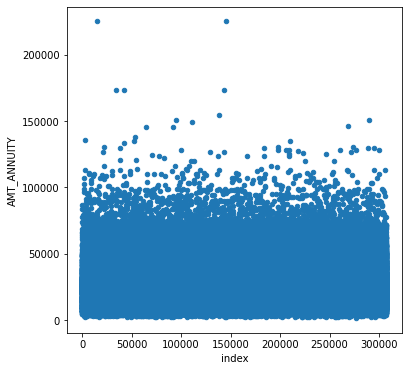

In [ ]:
engineered_data.plot(kind='scatter', x='index', y='AMT_ANNUITY', figsize=(6,6))

In [ ]:
df.iloc[:,[16,17,18,19,20,21,22,23,24,25]].tail()

,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE
6876,Municipal apartment,0.025164,-14319,-335,-4898.0,-3925,16.0,1,1,0
6877,House / apartment,0.018801,-9692,-386,-3121.0,-2361,13.0,1,1,1
6878,House / apartment,0.020246,-11355,-2191,-264.0,-3946,12.0,1,1,0
6879,House / apartment,0.018850,-13698,-595,-2950.0,-4156,9.0,1,1,0
6880,House / apartment,0.005002,-12683,-4137,-689.0,-4095,13.0,1,1,0


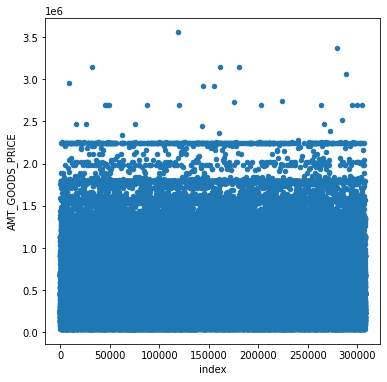

In [ ]:
engineered_data.plot(kind='scatter', x='index', y='AMT_GOODS_PRICE', figsize=(6,6))

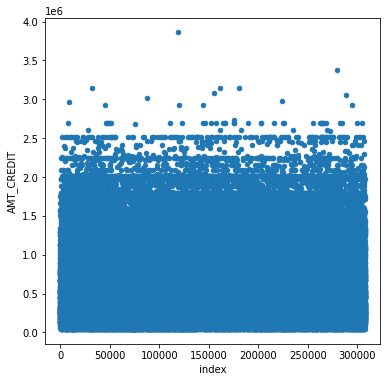

In [ ]:
engineered_data.plot(kind='scatter', x='index', y='AMT_CREDIT', figsize=(6,6))

In [ ]:
df['DAYS_REGISTRATION'].dtypes

dtype('float64')

In [ ]:
df['DAYS_REGISTRATION'] = pd.to_str(df['DAYS_REGISTRATION'])

AttributeError: ignored

In [ ]:
df['DAYS_ID_PUBLISH'] = pd.to_datetime(df['DAYS_ID_PUBLISH'],format='%Y/%m/%d')

In [ ]:
df['DAYS_ID_PUBLISH']

0      1969-12-31 23:59:59.999995772
1      1969-12-31 23:59:59.999995389
2      1969-12-31 23:59:59.999995041
3      1969-12-31 23:59:59.999996593
4      1969-12-31 23:59:59.999997348
                    ...             
7995   1969-12-31 23:59:59.999996515
7996   1969-12-31 23:59:59.999999148
7997   1969-12-31 23:59:59.999998249
7998   1969-12-31 23:59:59.999995282
7999   1969-12-31 23:59:59.999995968
Name: DAYS_ID_PUBLISH, Length: 8000, dtype: datetime64[ns]

In [ ]:
pandas.to_timedelta(arg, unit=None, errors='raise')

In [ ]:
korelasi=df.corr()
korelasi

,index,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
index,1.000000,0.008022,0.021605,0.009241,0.012855,-0.019528,-0.015439,-0.019219,-0.011856,-0.003565,...,0.009720,-0.013192,-0.007154,-0.007824,0.002752,-0.010576,-0.001197,-0.003581,0.010899,0.009334
SK_ID_CURR,0.008022,1.000000,0.008628,-0.001079,-0.019558,-0.016416,-0.037390,-0.020383,-0.005470,0.008818,...,0.027587,-0.002827,-0.007530,0.006837,-0.008199,-0.005617,-0.008227,-0.017654,-0.004389,-0.015201
TARGET,0.021605,0.008628,1.000000,-0.011329,-0.035448,-0.007748,-0.001176,-0.016664,-0.015222,0.041098,...,-0.003318,-0.005318,-0.008126,-0.004342,0.012202,0.010560,0.011158,-0.002587,0.021242,0.031361
CNT_CHILDREN,0.009241,-0.001079,-0.011329,1.000000,-0.023959,-0.014944,-0.018922,-0.022017,-0.029930,0.182712,...,-0.010527,-0.007124,-0.006964,-0.013148,-0.011814,-0.008141,-0.016498,-0.017700,-0.009607,-0.036837
AMT_INCOME_TOTAL,0.012855,-0.019558,-0.035448,-0.023959,1.000000,0.340033,0.409068,0.346606,0.209455,-0.116189,...,0.050804,0.009333,0.004652,0.034481,0.025873,0.005573,0.032335,0.021195,0.011511,-0.014167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.010576,-0.005617,0.010560,-0.008141,0.005573,0.024659,0.019589,0.024105,-0.001185,0.010702,...,0.008769,-0.001349,-0.002061,-0.001101,0.264542,1.000000,0.177536,0.001919,-0.011699,0.005810
AMT_REQ_CREDIT_BUREAU_WEEK,-0.001197,-0.008227,0.011158,-0.016498,0.032335,0.013774,0.030462,0.015413,-0.008736,-0.006629,...,-0.012567,-0.003923,-0.005994,-0.003203,0.033629,0.177536,1.000000,-0.013587,-0.040188,0.026185
AMT_REQ_CREDIT_BUREAU_MON,-0.003581,-0.017654,-0.002587,-0.017700,0.021195,0.059005,0.026409,0.055391,0.078634,-0.036561,...,-0.007510,-0.000701,-0.002514,-0.005968,-0.004866,0.001919,-0.013587,1.000000,-0.034869,-0.012218
AMT_REQ_CREDIT_BUREAU_QRT,0.010899,-0.004389,0.021242,-0.009607,0.011511,0.003190,0.017541,0.004574,-0.017819,-0.010825,...,-0.003185,-0.009034,-0.013804,-0.007376,-0.001013,-0.011699,-0.040188,-0.034869,1.000000,0.092044
